
   # Project: Bankruptcy Prevention

## Problem Statement

### Business Objective:
**This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.**

**The data file contains 7 features about 250 companies**

**The data set includes the following variables:**
- 1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- 2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- 3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
- 4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
- 5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
- 6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
- 7. class: bankruptcy, non-bankruptcy (target variable).

#### **Importing the libraries needed for the Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as smf

#### **Importing Warnings** 

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### **Importing data**

In [3]:
df = pd.read_csv('D:\\DS Project\\bankruptcy-prevention.csv',sep=";")


### EDA 

In [4]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [10]:
list(df.columns)

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk',
 ' class']

In [11]:
df.shape

(250, 7)

In [12]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [14]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [15]:
df_1 = df.drop_duplicates()

In [16]:
df_1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [17]:
df_1.shape

(103, 7)

#### Renameing the columns 

#Some of the columns names are having unwanted spaces

In [18]:
list(df_1.columns.values)

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk',
 ' class']

In [19]:
df_1.columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility','competitiveness', 'operating_risk', 'class']

In [20]:
list(df_1.columns.values)

['industrial_risk',
 'management_risk',
 'financial_flexibility',
 'credibility',
 'competitiveness',
 'operating_risk',
 'class']

### Data Visualization 

<AxesSubplot:xlabel='industrial_risk', ylabel='count'>

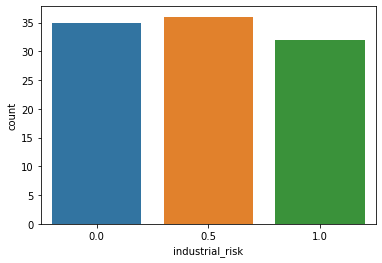

In [21]:
sns.countplot(x=df_1['industrial_risk'])

<AxesSubplot:xlabel='management_risk', ylabel='count'>

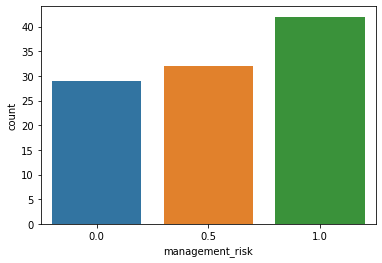

In [22]:
sns.countplot(x=df_1['management_risk'])

<AxesSubplot:xlabel='financial_flexibility', ylabel='count'>

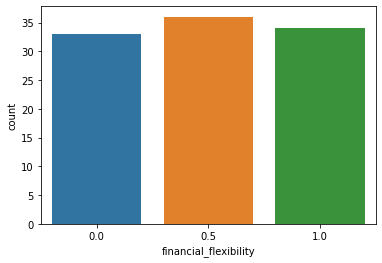

In [18]:
sns.countplot(x=df_1['financial_flexibility'])

<AxesSubplot:xlabel='credibility', ylabel='count'>

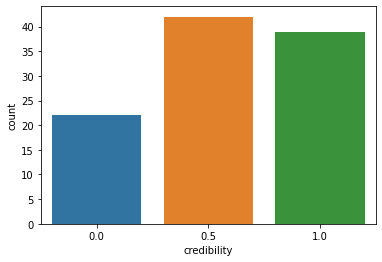

In [19]:
sns.countplot(x=df_1['credibility'])

<AxesSubplot:xlabel='competitiveness', ylabel='count'>

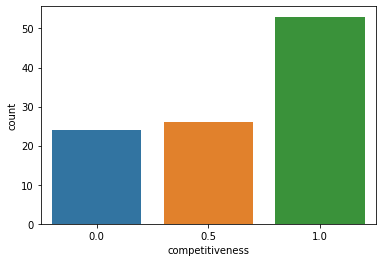

In [20]:
sns.countplot(x=df_1['competitiveness'])

<AxesSubplot:xlabel='operating_risk', ylabel='count'>

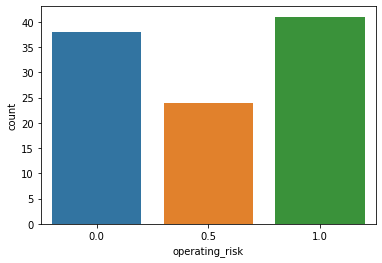

In [21]:
sns.countplot(x=df_1['operating_risk'])

<AxesSubplot:xlabel='class', ylabel='count'>

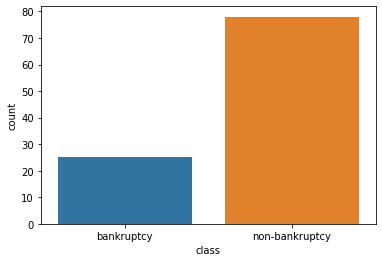

In [22]:
sns.countplot(x=df_1['class'])

#### Fequency distribution of the data

In [23]:
df_freq1 = df_1[['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']].apply(pd.Series.value_counts)

df_freq1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0.0,35,29,33,22,24,38
0.5,36,32,36,42,26,24
1.0,32,42,34,39,53,41


In [24]:
df_freq1 = df_freq1.T
df_freq1

,0.0,0.5,1.0
industrial_risk,35,36,32
management_risk,29,32,42
financial_flexibility,33,36,34
credibility,22,42,39
competitiveness,24,26,53
operating_risk,38,24,41


<AxesSubplot:>

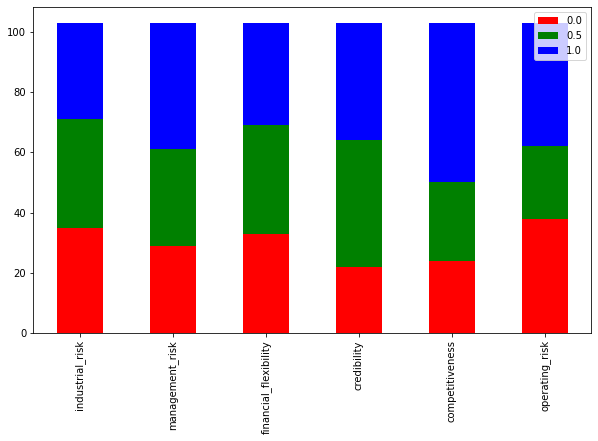

In [25]:
df_freq1.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'], figsize=(10, 6))

In [26]:
df_freq2 = df_1[['class']].apply(pd.Series.value_counts)
df_freq2

,class
non-bankruptcy,78
bankruptcy,25


In [27]:
df_freq2 = df_freq2.T
df_freq2

,non-bankruptcy,bankruptcy
class,78,25


<AxesSubplot:>

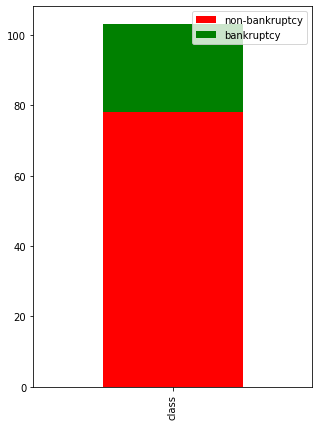

In [28]:
df_freq2.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(5,7))

In [29]:
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


### Conveting categorical variable "class" to ordinal data type

In [30]:
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [31]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_1['class'] = LE.fit_transform(df_1['class'])

In [32]:
df_1= df_1.iloc[:,:]
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,1
187,0.0,0.5,0.5,0.5,1.0,0.5,1
190,0.0,0.5,0.5,0.0,1.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,1


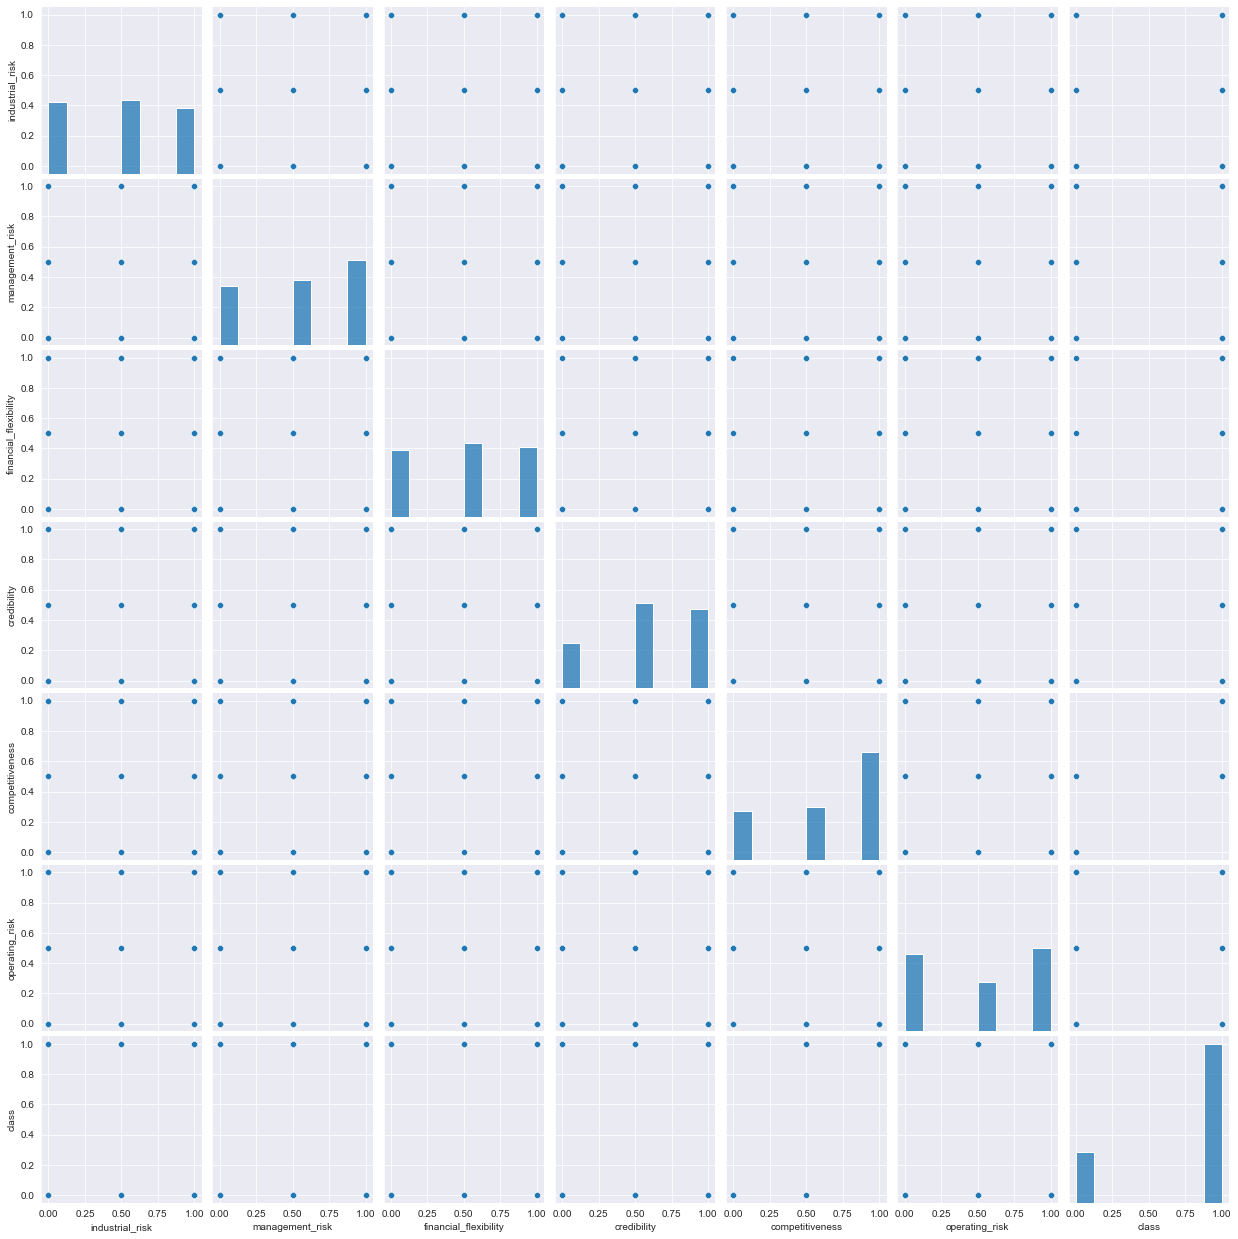

In [33]:
sns.set_style(style='darkgrid')
sns.pairplot(df_1)

<AxesSubplot:>

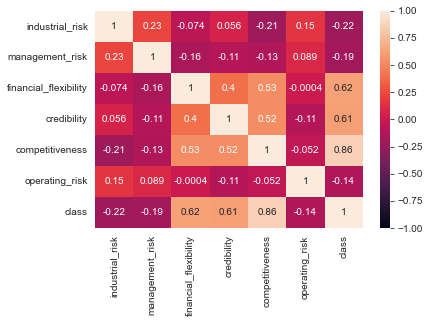

In [34]:
sns.heatmap(df_1.corr(), vmin = -1, vmax = 1, annot = True)

<AxesSubplot:xlabel='class'>

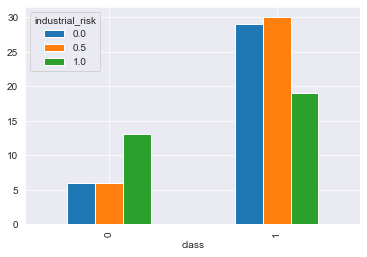

In [35]:
# for visualization 

pd.crosstab(df_1['class'], df_1['industrial_risk']).plot(kind='bar')

<AxesSubplot:xlabel='class'>

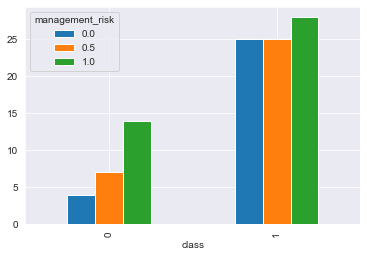

In [36]:
pd.crosstab(df_1['class'], df_1['management_risk']).plot(kind='bar')

<AxesSubplot:xlabel='class'>

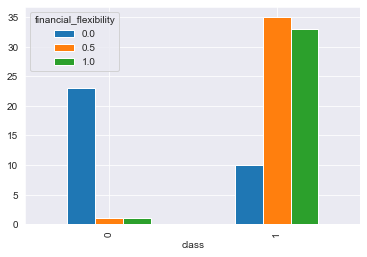

In [37]:
pd.crosstab(df_1['class'],df_1['financial_flexibility']).plot(kind = 'bar')

<AxesSubplot:xlabel='class'>

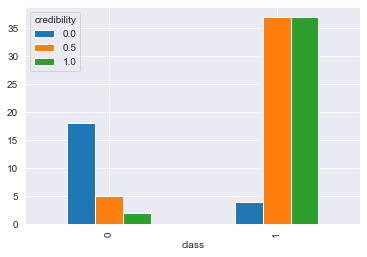

In [38]:
pd.crosstab(df_1['class'],df_1['credibility']).plot(kind = 'bar')

<AxesSubplot:xlabel='class'>

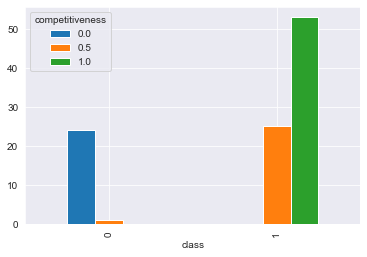

In [39]:
pd.crosstab(df_1['class'],df_1['competitiveness']).plot(kind = 'bar')

<AxesSubplot:xlabel='class'>

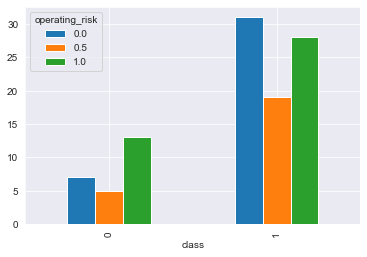

In [40]:
pd.crosstab( df_1['class'],df_1['operating_risk']).plot(kind='bar')

In [41]:
#pd.crosstab(df_1['financial_flexibility'], df_1['credibility']).plot(kind = 'bar')

In [42]:
X= df_1.iloc[:,0:6]
Y = df_1.iloc[:,6]

In [43]:
df_1 = df_1.reset_index()

In [44]:
df_1

,index,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
98,185,0.0,0.5,0.0,0.5,1.0,0.5,1
99,187,0.0,0.5,0.5,0.5,1.0,0.5,1
100,190,0.0,0.5,0.5,0.0,1.0,0.0,1
101,192,0.5,1.0,0.0,0.0,1.0,0.0,1


In [45]:
df_1.drop('index', inplace=True, axis=1)

In [46]:
df_1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
98,0.0,0.5,0.0,0.5,1.0,0.5,1
99,0.0,0.5,0.5,0.5,1.0,0.5,1
100,0.0,0.5,0.5,0.0,1.0,0.0,1
101,0.5,1.0,0.0,0.0,1.0,0.0,1


In [47]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(X)
y=dbscan.labels_
y=pd.DataFrame(y)
y.value_counts()

 0    102
-1      1
dtype: int64

In [48]:
c1 = pd.DataFrame(dbscan.labels_,columns=["clusters"])
clustered = pd.concat([df_1,c1],axis = 1)
clustered

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,clusters
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...
98,0.0,0.5,0.0,0.5,1.0,0.5,1,0
99,0.0,0.5,0.5,0.5,1.0,0.5,1,0
100,0.0,0.5,0.5,0.0,1.0,0.0,1,0
101,0.5,1.0,0.0,0.0,1.0,0.0,1,0


In [49]:
noisedata = clustered[clustered['clusters']==-1]
print(noisedata)

    industrial_risk  management_risk  financial_flexibility  credibility  \
24              1.0              0.5                    1.0          0.5   

    competitiveness  operating_risk  class  clusters  
24              0.0             0.0      0        -1  


In [50]:
df_2 = clustered[clustered['clusters']>=0]
df_2.shape

(102, 8)

# Model Validation

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

## Model Fitting

### Logistic Regression


In [52]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test= LR.predict(X_test)
from sklearn.metrics import accuracy_score
print("Train Accuracy",accuracy_score(Y_train,Y_pred_train).round(2))
print("Test Accuracy",accuracy_score(Y_test,Y_pred_test).round(2))

Train Accuracy 0.99
Test Accuracy 0.95


In [53]:
train_accuracy_lg = []
test_accuracy_lg = []
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=(i))
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test) 
    train_accuracy_lg.append(accuracy_score(Y_train, Y_pred_train))
    test_accuracy_lg.append(accuracy_score(Y_test, Y_pred_test))

print("Train Accuracy",np.mean(train_accuracy_lg).round(2))
print("Test Accuracy",np.mean(test_accuracy_lg).round(2))


Train Accuracy 0.99
Test Accuracy 0.98


### Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
Y_predtrain_NB = MNB.predict(X_train)
Y_predtest_NB = MNB.predict(X_test)
print("Train Accuracy",accuracy_score(Y_train,Y_predtrain_NB).round(2))
print("Test Accuracy",accuracy_score(Y_test,Y_predtest_NB).round(2))

Train Accuracy 0.92
Test Accuracy 0.81


In [55]:
train_accuracy_NB = []
test_accuracy_NB= []
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=(i))
    LR = LogisticRegression()
    LR.fit(X_train, Y_train)
    Y_predtrain_NB = MNB.predict(X_train)
    Y_predtest_NB = MNB.predict(X_test) 
    train_accuracy_NB.append(accuracy_score(Y_train, Y_predtrain_NB))
    test_accuracy_NB.append(accuracy_score(Y_test, Y_predtest_NB))
print("Train Accuracy",np.mean(train_accuracy_NB).round(2))
print("Test Accuracy",np.mean(test_accuracy_NB).round(2))

Train Accuracy 0.88
Test Accuracy 0.88


### KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7, p=2)
KNN.fit(X_train,Y_train)
Y_predtrain_KNN = KNN.predict(X_train)
Y_predtest_KNN =  KNN.predict(X_test)
print("Train Accuracy",accuracy_score(Y_train,Y_predtrain_KNN).round(2))
print("Test Accuracy",accuracy_score(Y_test,Y_predtest_KNN).round(2))

Train Accuracy 1.0
Test Accuracy 0.97


In [57]:
train_accuracy_KNN = []
test_accuracy_KNN= []
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=(i))
    KNN = KNeighborsClassifier(n_neighbors=7, p=2)
    KNN.fit(X_train,Y_train)
    Y_predtrain_KNN = KNN.predict(X_train)
    Y_predtest_KNN =  KNN.predict(X_test)
    train_accuracy_KNN.append(accuracy_score(Y_train, Y_predtrain_KNN))
    test_accuracy_KNN.append(accuracy_score(Y_test, Y_predtest_KNN))
    
print("Train Accuracy",np.mean(train_accuracy_NB).round(2))
print("Test Accuracy",np.mean(test_accuracy_NB).round(2))

Train Accuracy 0.88
Test Accuracy 0.88


### Support Vector Classifier

In [58]:
from sklearn.svm import SVC
from sklearn.svm import SVC
#svm = SVC(kernel='linear', C=3.0)
svm = SVC(kernel='poly',degree=6)
#svm = SVC(kernel='rbf', gamma=2)
svm.fit(X_train, Y_train)
Y_predtrain_SVM = svm.predict(X_train)
Y_predtest_SVM = svm.predict(X_test)
print("Training Accuracy :",accuracy_score(Y_train, Y_predtrain_SVM).round(2))
print("Testing Accuracy:",accuracy_score(Y_test, Y_predtest_SVM).round(2))

Training Accuracy : 0.99
Testing Accuracy: 0.97


### Decision Tree Classifier 

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=(4)) 
dt.fit(X_train, Y_train)
Y_predtrain_dt = dt.predict(X_train) 
Y_predtest_dt = dt.predict(X_test) 
print("Training Accuracy: ",accuracy_score(Y_train,Y_predtrain_dt).round(2))
print("Test Accuracy: ",accuracy_score(Y_test,Y_predtest_dt).round(2))

Training Accuracy:  1.0
Test Accuracy:  0.97


### Bagging Classifier 

In [60]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=(dt),n_estimators=100,max_samples=0.7,max_features=0.7,random_state=4) 
bag.fit(X_train, Y_train)
Y_predtrain_bag = bag.predict(X_train) 
Y_predtest_bag = bag.predict(X_test) 
print("Training Accuracy: ",accuracy_score(Y_train,Y_predtrain_bag).round(2))
print("Test Accuracy: ",accuracy_score(Y_test,Y_predtest_bag).round(2))

Training Accuracy:  1.0
Test Accuracy:  0.97


In [61]:
train_accuracy_bag = []
test_accuracy_bag= []
for i in range(1,500):
    bag = BaggingClassifier(base_estimator=(dt),n_estimators=10,max_samples=0.9,max_features=0.7,random_state=i) 
    bag.fit(X_train, Y_train)
    Y_predtrain_bag = bag.predict(X_train) 
    Y_predtest_bag = bag.predict(X_test) 
    train_accuracy_bag.append(accuracy_score(Y_train,Y_predtrain_bag).round(2))
    test_accuracy_bag.append(accuracy_score(Y_test,Y_predtest_bag).round(2))
    
print("Train Accuracy",np.mean(train_accuracy_bag).round(2))
print("Test Accuracy",np.mean(test_accuracy_bag).round(2))

Train Accuracy 1.0
Test Accuracy 0.97


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_samples=0.9,max_features=0.5,random_state=5,max_depth=(3)) 
RFC.fit(X_train, Y_train)

Y_pred_train = RFC.predict(X_train) 
Y_pred_test = RFC.predict(X_test) 

print("Training accuracy: ",accuracy_score(Y_train,Y_pred_train).round(2))
print("Test accuracy: ",accuracy_score(Y_test,Y_pred_test).round(2))

Training accuracy:  1.0
Test accuracy:  1.0


In [66]:
train_accuracy_rf = []
test_accuracy_rf= []
for i in range(1,500):
    RFR = RandomForestClassifier(n_estimators=100,max_samples=0.9,max_features=0.5,random_state=5,max_depth=(3)) 
    RFR.fit(X_train, Y_train)
    Y_predtrain_rf = RFR.predict(X_train) 
    Y_predtest_rf = RFR.predict(X_test) 
    train_accuracy_rf.append(accuracy_score(Y_train,Y_predtrain_rf).round(2))
    test_accuracy_rf.append(accuracy_score(Y_test,Y_predtest_rf).round(2))
    
print("Train Accuracy",np.mean(train_accuracy_rf).round(2))
print("Test Accuracy",np.mean(test_accuracy_rf).round(2))

Train Accuracy 1.0
Test Accuracy 1.0
